In [1]:
import pandas as pd 
import numpy as np 
import re
import more_itertools as mit
import re
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import sys
!{sys.executable} -m pip install plotly
!{sys.executable} -m pip install pyshp
!{sys.executable} -m pip install shapely
import plotly
import plotly.graph_objects as go

In [5]:
from urllib.request import urlopen
import json
#with urlopen('https://github.com/jamestang7/Coding-Challenge/blob/main/MPVDatasetDownload.xlsx') as response:
#     counties = json.load(response)
file='https://mappingpoliceviolence.org/s/MPVDatasetDownload.xlsx'
df=pd.read_excel(file)
df.head(100)

,Victim's name,Victim's age,Victim's gender,Victim's race,URL of image of victim,Date of Incident (month/day/year),Street Address of Incident,City,State,Zipcode,...,Unarmed/Did Not Have an Actual Weapon,Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database),Alleged Threat Level (Source: WaPo),Fleeing (Source: WaPo),Body Camera (Source: WaPo),WaPo ID (If included in WaPo database),Off-Duty Killing?,Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx ),MPV ID,Fatal Encounters ID
0,Christopher Ulmer,30,Male,Unknown race,NaN,2020-10-04,I-805,Chula Vista,CA,91911.0,...,Unclear,undetermined,other,Car,No,6206.0,NaN,Suburban,8511,28894.0
1,Jonathan Price,31,Male,Black,https://fatalencounters.org/wp-content/uploads...,2020-10-03,103 Santa Fe St.,Wolfe City,TX,75496.0,...,Unarmed/Did Not Have an Actual Weapon,no object,undetermined,Not Fleeing,No,6204.0,NaN,Rural,8510,28893.0
2,John Aycoth,20,Male,Unknown race,NaN,2020-10-03,400 14th Ave. South,Myrtle Beach,SC,29577.0,...,Unclear,undetermined,attack,NaN,No,6205.0,NaN,Urban,8509,28890.0
3,James Edward Baker,38,Male,White,https://fatalencounters.org/wp-content/uploads...,2020-10-02,2000 Aenon Church Road,Tallahassee,FL,32310.0,...,Allegedly Armed,gun,attack,Not fleeing,No,6207.0,NaN,Suburban,8508,28896.0
4,Mickel Erich Lewis Sr.,39,Male,Unknown race,NaN,2020-10-02,K Street and Mono Street,Mojave,CA,93501.0,...,Unclear,undetermined,other,Foot,No,6208.0,NaN,Rural,8507,28885.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Cesar Sanchez Ruiz,36,Male,Hispanic,NaN,2020-08-20,10701 CA-178,Bakersfield,CA,93306.0,...,Allegedly Armed,gun,attack,NaN,NaN,NaN,off-duty,Suburban,8410,20536.0
96,Name withheld by police,Unknown,Male,Unknown race,NaN,2020-08-20,15301 Peach Orchard Road,Brooksville,FL,34614.0,...,Allegedly Armed,gun,attack,NaN,No,6102.0,NaN,Rural,8408,NaN
97,Shiloh D. Smith,35,Male,White,https://fatalencounters.org/wp-content/uploads...,2020-08-20,MO-31 and Fairmont Road,Amity,MO,64422.0,...,Allegedly Armed,gun,attack,Car,NaN,NaN,NaN,Rural,8412,NaN
98,Jeffrey Wratten,37,Male,White,NaN,2020-08-20,AR-5 and Magness Creek Dr,Cabot,AR,72023.0,...,Allegedly Armed,gun,undetermined,NaN,No,6101.0,NaN,Suburban,8411,NaN


In [6]:
# Cleaning NaN data
nan=df.iloc[0,3]
def NA_portion(list):
    rate=0
    for i in list:
        if pd.isna(i)== False and i!=nan:
            continue
        else:
            rate+=1
    total=len(list)
    return round(rate/total*100,ndigits=2)
lst=[]
for col in list(df.columns):
    rate=NA_portion(df[col])
    lst.append(rate)
# Truncate column names
col=list(df.columns)
col[-3],col[-9]='Geographical location','Alleged Weapon'
pd.DataFrame(lst,index=col,columns=['NA rate(%)'])

,NA rate(%)
Victim's name,0.00
Victim's age,0.13
Victim's gender,0.15
Victim's race,10.10
URL of image of victim,46.22
Date of Incident (month/day/year),0.00
Street Address of Incident,1.05
City,0.07
State,0.00
Zipcode,0.42


In [16]:
states_occurances=dict(location for location in df['State'].value_counts().items())
states=list(states_occurances.keys())
values=list(states_occurances.values())
df_counts=pd.DataFrame(data=values,index=states,columns=['# of police violence'])
for col in df_counts.columns:
    df_counts[col] = df_counts[col].astype(str)
df_counts['text'] ='Number of police violence'+'<br>'+'State:'+ df_counts.index + '<br>'

fig = go.Figure(data=go.Choropleth(
    locations=states,
    z=values,
    locationmode='USA-states',
    colorscale='Reds',
    autocolorscale=False,
    text=df_counts['text'], # hover text
    marker_line_color='white', # line markers between states
    colorbar_title="Cases number"
))

fig.update_layout(
    title_text='Number of Police Violence in US till Oct 2020<br>(Hover for breakdown)',
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=False, 
        lakecolor='rgb(255, 255, 255)'),
)

fig.show()

In [103]:
#Extract data from 2019 calendar year
import datetime
start=datetime.datetime(2019,1,1)
end=datetime.datetime(2020,1,1)
rng = pd.date_range(start, end)
df_2019=df[df['Date of Incident (month/day/year)']>=start]
df_2019=df_2019[df_2019['Date of Incident (month/day/year)']<end]

In [104]:
df_2019.tail()
df_2019.head()
#Get frequncy data and sort it by date
df_2019=df_2019['Date of Incident (month/day/year)'].value_counts(sort= False).sort_index()
df_2019=dict(df_2019.cumsum().items())

#Extract 2020 data
start=datetime.datetime(2020,1,1)
end=datetime.datetime(2020,10,4)
df_2020=df[df['Date of Incident (month/day/year)']>=start]
df_2020=df_2020[df_2020['Date of Incident (month/day/year)']<end]
df_2020=df_2020['Date of Incident (month/day/year)'].value_counts(sort= False).sort_index()
df_2020=dict(df_2020.cumsum().items())

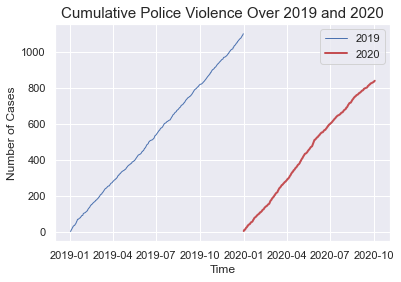

In [117]:
#Plot 2019 cases 
plt.figure()
plt.plot(list(df_2019.keys()),list(df_2019.values()),'b-',linewidth=1)
plt.plot(list(df_2020.keys()),list(df_2020.values()),'r-',linewidth=2)
plt.title('Cumulative Police Violence Over 2019 and 2020',fontsize=15)
plt.xlabel('Time')
plt.legend(['2019','2020'],loc='best')
plt.ylabel('Number of Cases')
plt.show()